In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('../data/database.json')

authors = list(df[(df['author'] != '')]['author'])


sender = list(df.loc[((df['sender'].str.len() < 50) & (df['sender'] != ''))]['sender'])

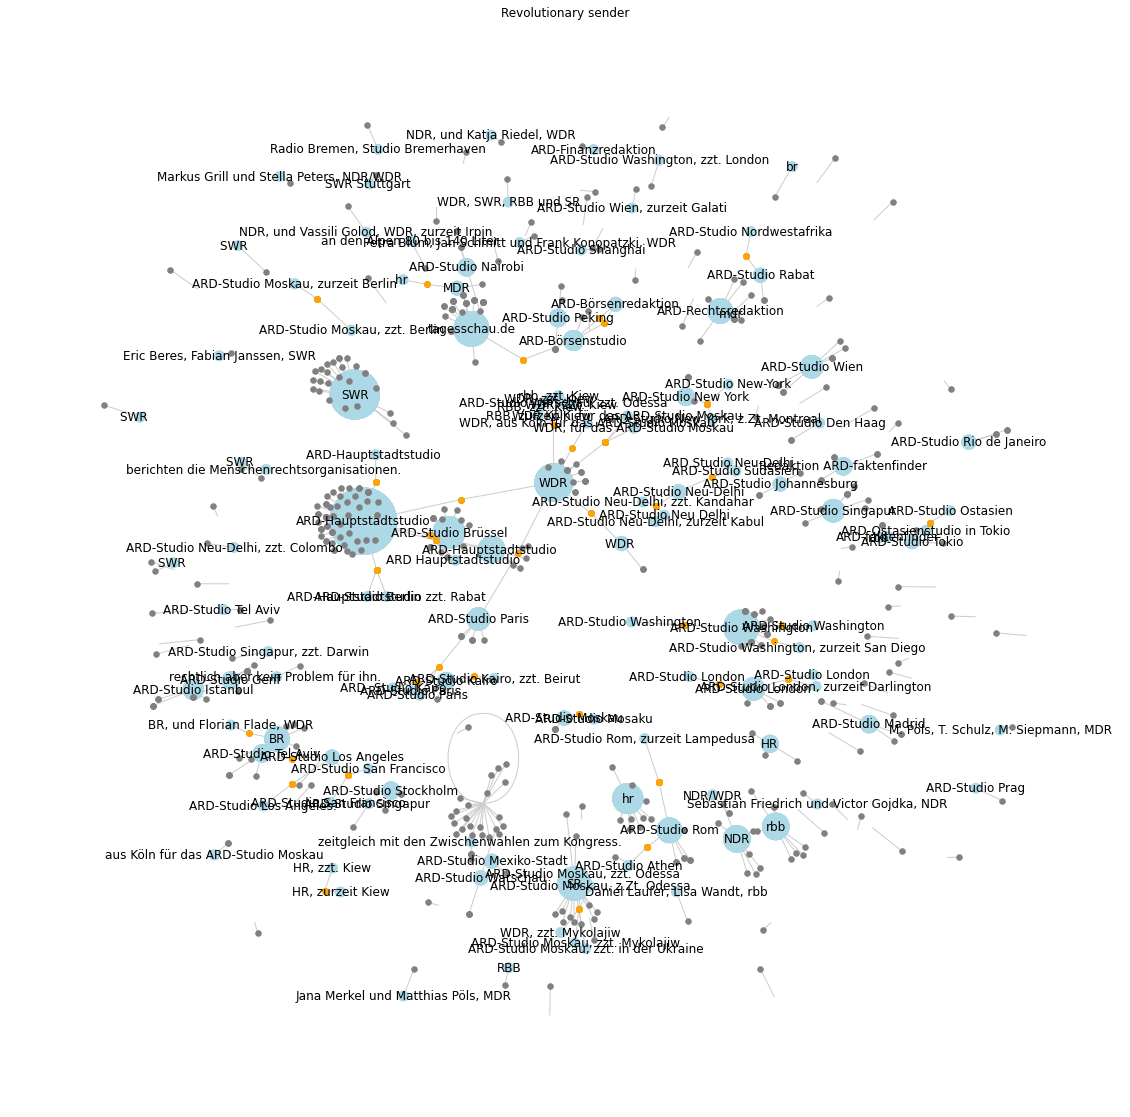

In [10]:
import networkx as nx

plt.figure(figsize=(20, 20))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='author', target='sender') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=25)

# 3. Draw the parts we want
# Edges thin and grey
# authors small and grey
# sender sized according to their number of connections
# sender blue
# Labels for sender ONLY
# authors who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
club_size = [g.degree(club) * 100 for club in sender]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=sender, 
                       node_size=club_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=authors, node_color='grey', node_size=30)

# Draw POPULAR authors
popular_authors = [person for person in authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='orange', node_size=30)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(sender, sender))
nx.draw_networkx_labels(g, layout, labels=node_labels, font_size=12)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary sender")

# 5. Tell matplotlib to show it
plt.show()